### Import financial data for the companies

In [11]:
# import  required libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [12]:
#import for stock data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# import for reading stock dataa from google finance ## install 'pip install pandas_datareader' before importing here in anacaonda only..
from pandas_datareader import data
#import pandas_datareader.data as dt

In [14]:
#import for time stamp(historical data time frame)
from datetime import datetime

In [27]:
#define stocks (stocker ticker symbols) to be used for data analytics
stock_list =['AAPL','AMZN','MSFT','YHOO','GOOG']

# define end and start date for fetching historicla data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
#for transversing through the stock list and setting up as a dataframe
for stock_symbol in stock_list:
    #set stock ticker in the dataframe - reading from google finance
    globals() [stock_symbol] = data.DataReader(stock_symbol, 'google', start, end)

In [28]:
#view summary stats of the Apple stock
AAPL.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,124.850238,125.703889,124.111270,124.994444,3.054017e+07
std,17.487495,17.483788,17.338089,17.407383,1.412597e+07
min,94.600000,95.660000,94.370000,95.530000,1.147592e+07
25%,110.110000,111.287500,109.397500,110.492500,2.218417e+07
50%,117.790000,118.190000,117.065000,117.640000,2.666322e+07
75%,141.960000,142.830000,141.065000,141.940000,3.387038e+07
max,156.010000,156.650000,155.050000,156.100000,1.123403e+08


In [19]:
#view general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-07-06 to 2017-07-05
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [29]:
#create a pandas dataframe for AAPL stocks
df_APPL = pd.DataFrame(AAPL['Close'])

In [30]:
#view first 5 records
df_APPL.head()

,Close
Date,
2016-07-06,95.53
2016-07-07,95.94
2016-07-08,96.68
2016-07-11,96.98
2016-07-12,97.42


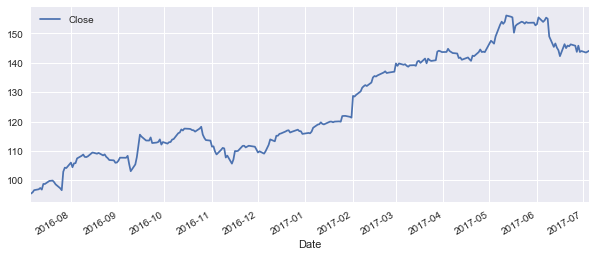

In [32]:
# view historical closing price data
df_APPL.plot(legend=True, figsize=(10,4))

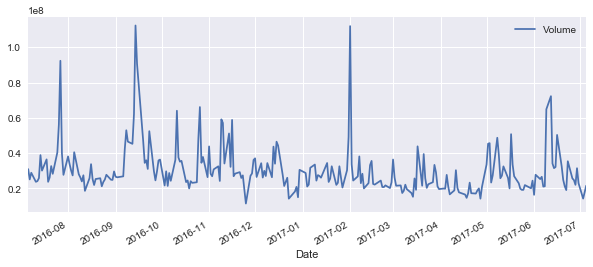

In [33]:
#view volume of stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

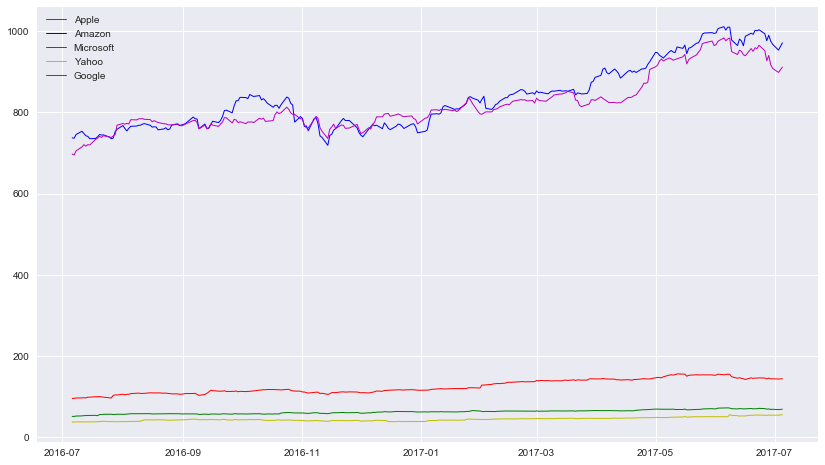

In [36]:
#plot all stock performance on Close for entire year
plt.figure(figsize=(14,8))
plt.plot(AAPL['Close'], 'r', label='Apple',linewidth=1)
plt.plot(AMZN['Close'], 'b', label='Amazon',linewidth=1)
plt.plot(MSFT['Close'], 'g', label='Microsoft',linewidth=1)
plt.plot(YHOO['Close'], 'y', label='Yahoo',linewidth=1)
plt.plot(GOOG['Close'], 'm', label='Google',linewidth=1)
#set legend
plt.legend()
plt.show()

### Daily Return Analysis and Correlation Between Different Stocks

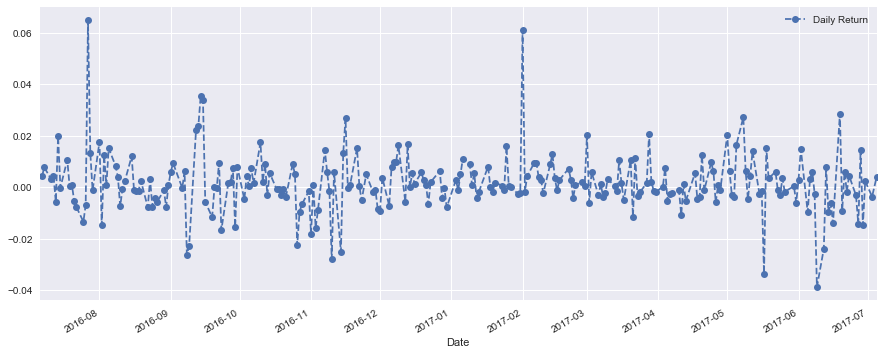

In [38]:
#compute percent change using built in pct_change method for the Apple stock
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6), legend=True, linestyle='--', marker='o')

In [40]:
#Fetch closing prices for stock symbols and put them into the data frame
closing_price_stock = data.DataReader(['AAPL','AMZN','MSFT','GOOG','YHOO'],'google',start,end)['Close']

In [41]:
#view first 5 records of closing price for eacah stock
closing_price_stock.head()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2016-07-06,95.53,737.61,697.77,51.38,37.51
2016-07-07,95.94,736.57,695.36,51.38,37.52
2016-07-08,96.68,745.81,705.63,52.30,37.74
2016-07-11,96.98,753.78,715.09,52.59,37.96
2016-07-12,97.42,748.21,720.64,53.21,37.89


In [42]:
#compute percentage change using built in pct_change method for the stocks
stock_returns = closing_price_stock.pct_change()

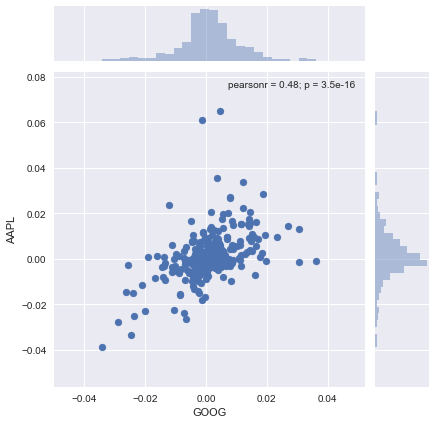

In [44]:
#compare daily return of Google and Apple
sns.jointplot('GOOG','AAPL', stock_returns, kind='scatter')

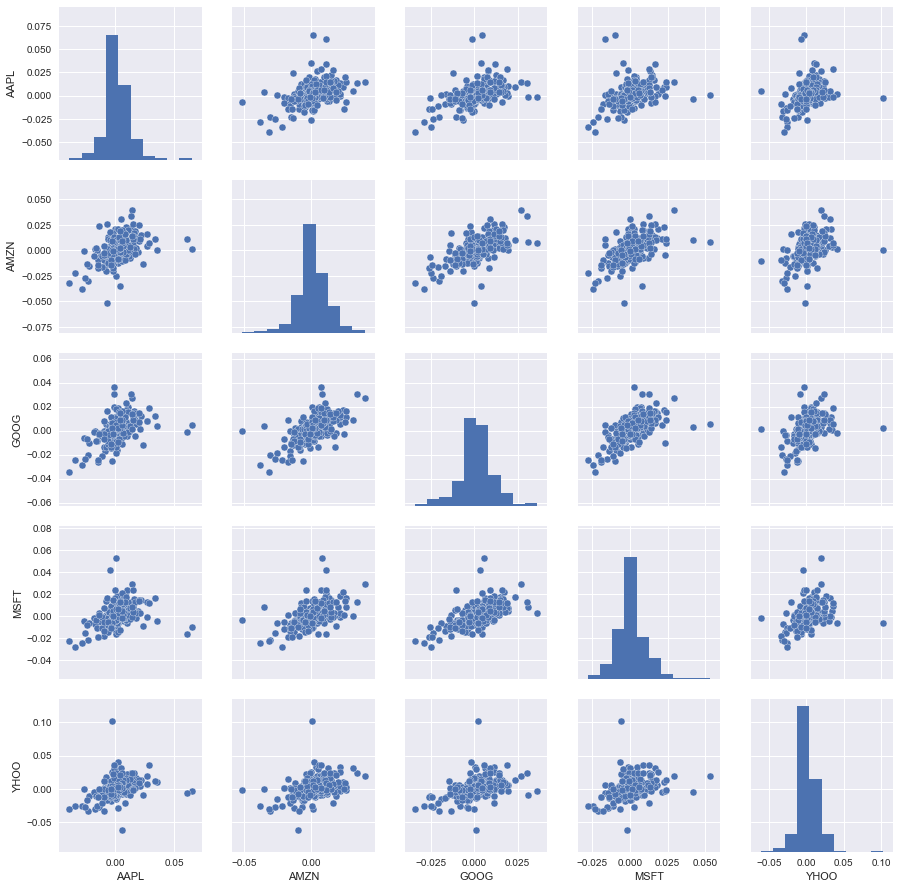

In [45]:
#using pair plot for complete visual analysis and comparison of all stocks
sns.pairplot(stock_returns.dropna())

### Risk analysis

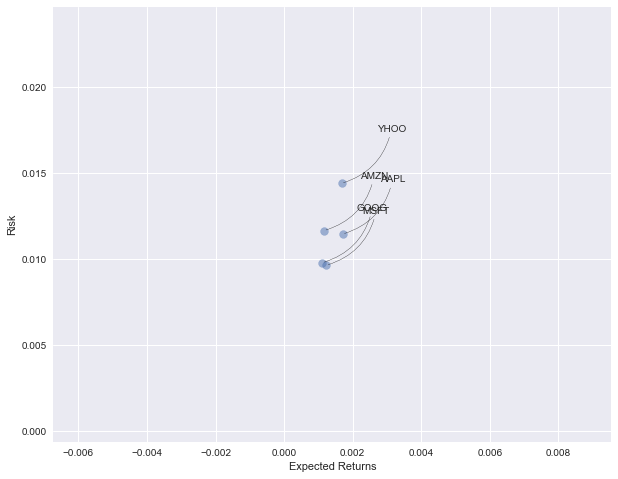

In [52]:
#comparing the expected return with the standard devaition of the daily return
returns = stock_returns.dropna()
area = np.pi*20
plt.figure(figsize=(10,8))
plt.scatter(returns.mean(),returns.std(),alpha=0.5, s = area)
#Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
#set the graph properties
for label, x,y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
    label,
        xy=(x,y), xytext=(50,50),
        textcoords = 'offset points', ha='center', va = 'bottom',
        arrowprops = dict(arrowstyle='-', connectionstyle='arc3, rad=-0.3')
    )